# **League of Legends**
> ## Competitive matches (2015 - 2018)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks')
%matplotlib inline

In [6]:
#Loading our dataset
df_lol = pd.read_csv('LeagueofLegends.csv')
df_matchinfo = pd.read_csv('matchinfo.csv')

In [7]:
df_matchinfo.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [3]:
#Columns of the df_lol
df_lol.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [4]:
#Columns of the df_matchinfo
df_matchinfo.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

In [5]:
#Champions of the dataset Matchinfo
df_matchinfo.League.unique()

array(['NALCS', 'EULCS', 'LCK', 'LMS', 'CBLoL', 'TCL', 'OPL', 'CLS',
       'LLN', 'LJL', 'LCL', 'WC', 'MSI', 'IEM', 'RR'], dtype=object)

# **Average time each league takes to finish the match**

>  ## 2015

In [9]:
#Firstly, we must remove the championships because they are different from leagues
df = df_matchinfo.copy()
remove_indexs = df.loc[(df['League'] == 'WC') | (df['League'] == 'MSI') 
                       | (df['League'] == 'IEM') | (df['League'] == 'CLS') | (df['League'] == 'RR')]
df = df.drop(remove_indexs.index)
#We will use that dataset
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [10]:
#Now, we will filter this by the year 2015 and the features we want
#It's worth mentioning in the year 2015 hadn't the leagues CBLoL, OPL, CLS, LLN, LJL, LCL, and RR
df_2015 = df[df['Year'] == 2015]
league_gamelength2015 = df_2015[['League','gamelength']]
league_gamelength2015.head()

,League,gamelength
0,NALCS,40
1,NALCS,38
2,NALCS,40
3,NALCS,41
4,NALCS,35


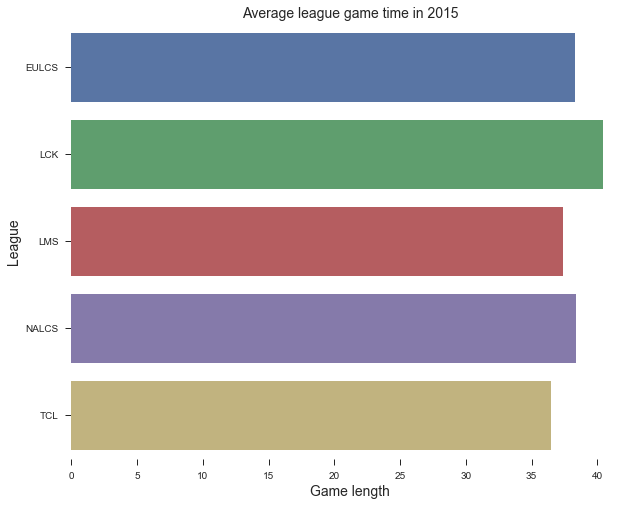

In [11]:
#Let's display our data
league_gamelength2015 = league_gamelength2015.groupby('League', as_index = False)['gamelength'].mean()

fig = plt.subplots(figsize=(10,8))

sns.barplot(x = 'gamelength', y = 'League', data = league_gamelength2015, label = 'Game length')
plt.xlabel('Game length', fontdict = {'size': 14})
plt.ylabel('League', fontdict = {'size': 14})
plt.title('Average league game time in 2015', fontdict = {'size': 14})
sns.despine(left = True, bottom = True)

> ## 2016

In [12]:
#Now, we will filter this by the year 2016 and the features we want
#It's worth mentioning in the year 2016 hadn't the league LLN
df_2016 = df[df['Year'] == 2016]
league_gamelength2016 = df_2016[['League','gamelength']]
league_gamelength2016.head()

,League,gamelength
245,NALCS,45
246,NALCS,28
247,NALCS,41
248,NALCS,62
249,NALCS,37


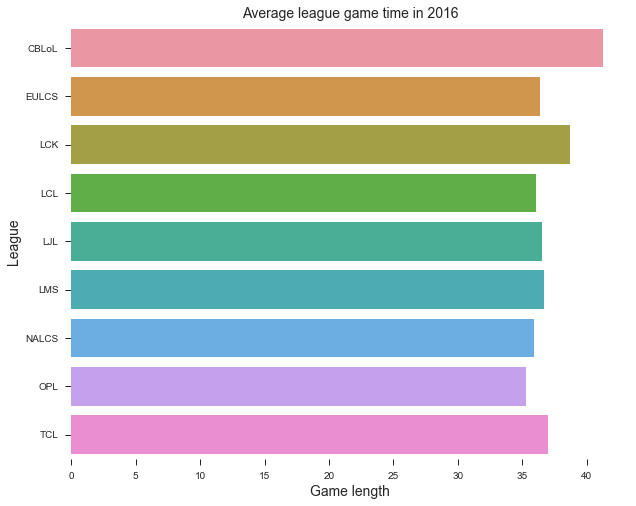

In [13]:
#Let's display our data
league_gamelength2016 = league_gamelength2016.groupby('League', as_index = False)['gamelength'].mean()

fig = plt.subplots(figsize=(10,8))

sns.barplot(x = 'gamelength', y = 'League', data = league_gamelength2016, label = 'Game length')
plt.xlabel('Game length', fontdict = {'size': 14})
plt.ylabel('League', fontdict = {'size': 14})
plt.title('Average league game time in 2016', fontdict = {'size': 14})
sns.despine(left = True, bottom = True)

> ## 2017

In [14]:
#Now, we will filter this by the year 2017 and the features we want
df_2017 = df[df['Year'] == 2017]
league_gamelength2017 = df_2017[['League','gamelength']]
league_gamelength2017.head()

,League,gamelength
609,NALCS,41
610,NALCS,37
611,NALCS,39
612,NALCS,25
613,NALCS,35


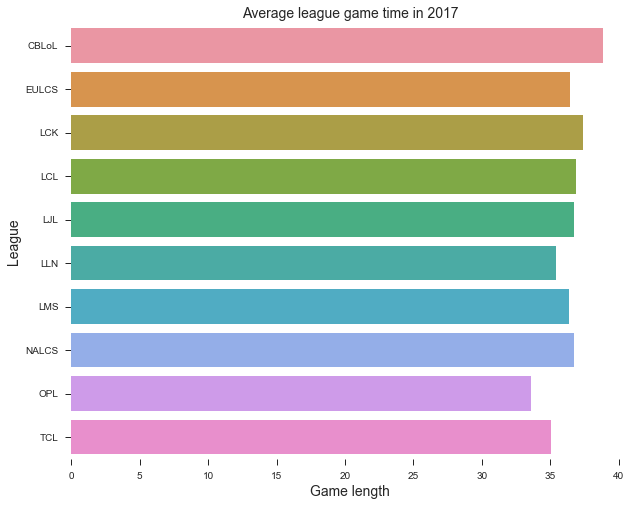

In [15]:
#Let's display our data
league_gamelength2017 = league_gamelength2017.groupby('League', as_index = False)['gamelength'].mean()

fig = plt.subplots(figsize=(10,8))

sns.barplot(x = 'gamelength', y = 'League', data = league_gamelength2017, label = 'Game length')
plt.xlabel('Game length', fontdict = {'size': 14})
plt.ylabel('League', fontdict = {'size': 14})
plt.title('Average league game time in 2017', fontdict = {'size': 14})
sns.despine(left = True, bottom = True)

> ## 2018

In [16]:
#Now, we will filter this by the year 2018 and the features we want
#It's worth mentioning in the year 2018 hadn't the league LLN, LJL and LCL
df_2018 = df[df['Year'] == 2018]
league_gamelength2018 = df_2018[['League','gamelength']]
league_gamelength2018.head()

,League,gamelength
7058,NALCS,29
7059,NALCS,65
7060,NALCS,40
7061,NALCS,30
7062,EULCS,43


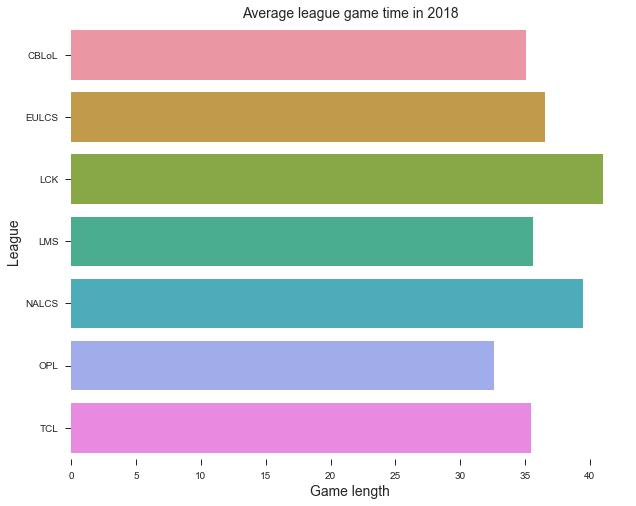

In [17]:
#Let's display our data
league_gamelength2018 = league_gamelength2018.groupby('League', as_index = False)['gamelength'].mean()

fig = plt.subplots(figsize=(10,8))

sns.barplot(x = 'gamelength', y = 'League', data = league_gamelength2018, label = 'Game length')
plt.xlabel('Game length', fontdict = {'size': 14})
plt.ylabel('League', fontdict = {'size': 14})
plt.title('Average league game time in 2018', fontdict = {'size': 14})
sns.despine(left = True, bottom = True)

# **Evolution of gaming average time over the years (2016 - 2018)**

In [18]:
#We must chose the columns that's interesting for our analysis
df_years = df[['Year', 'League', 'gamelength']].groupby(['League','Year'], as_index = False).mean()

#Now, we have removed the years and leagues that don't matter for our analysis, because they don't have data for the period 2016 to 2018
remove_indexs = df_years.loc[(df_years['Year'] == 2015) | (df_years['League'] == 'LJL') |
                            (df_years['League'] == 'LCL') | (df_years['League'] == 'LLN')]
df_years = df_years.drop(remove_indexs.index)

#Now, we transform the dataframe the way we want
df_years = df_years.pivot(index = 'Year', columns = 'League', values = 'gamelength')
df_years

League,CBLoL,EULCS,LCK,LMS,NALCS,OPL,TCL
Year,,,,,,,
2016,41.260274,36.396648,38.709544,36.665385,35.890909,35.302752,36.990610
2017,38.845588,36.457711,37.388119,36.393728,36.715342,33.605381,35.063197
2018,35.052632,36.525000,40.984615,35.588235,39.461538,32.588235,35.421053


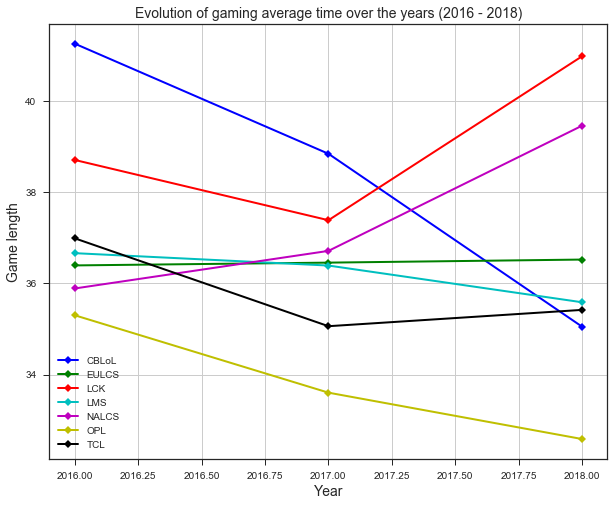

In [19]:
#Let's display our data
fig = plt.subplots(figsize=(10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i,j in zip(df_years.columns, colors):
    plt.plot(df_years[i], linewidth=2, markersize=5, marker = 'D', label = i, color = j)

plt.title('Evolution of gaming average time over the years (2016 - 2018)', fontdict = {'size': 14})
plt.xlabel('Year', fontdict = {'size': 14})
plt.ylabel('Game length', fontdict = {'size': 14})
plt.legend()
plt.grid(True)
plt.show()